# Using Deep Learning Tools

## 들어가기에 앞서

 지난 시간에 CNN에 대해 간략하게 나마 알아보았다. <br>
이번에는 교수님께서 제공해주신 예제들을 통해 친숙해져보도록 하겠다.

`!nvidia-smi`는 nvidia gpu resource들을 모니터링하는 명령어이다.

In [1]:
!nvidia-smi

Wed Jan 20 06:56:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   41C    P0    51W / 300W |   1561MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   40C    P0    54W / 300W |    626MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

랩실에서 실제로 사용하고 있는 서버이기 때문에 리소스를 확인하고 적절히 분배해서 사용해야한다.

```python
# using gpu:/1
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)
```
위와 같은 코드를 사용하면 GPU #1번을 사용하는 것이다. 또한, 한꺼번에 모든 메모리를 사용하는 것이 아닌 `tf.config.experimental.set_memory_growth`를 사용해 메모리를 증가시키며 사용한다.

In [4]:
# using gpu:/1
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

`MNIST dataset`은 튜링어워드를 수상하셨던 `Convolution network`의 창시자 `Yann LeCun`가 제공해주시는 데이터셋이다.<br>
이를 활용하여 실습을 진행해보겠다.

`MNIST dataset`은 손으로 쓴 숫자 이미지를 벡터로 나타낸 images와 그 이미지가 의미하는 숫자를 나타내는 labels로 이루어져 있다. 한개의 이미지는 `28*28(=784)의 픽셀`로 이루어져 있기 때문에 이는 784차원의 벡터로 저장되어 있고 진하기의 정도에 따라 0~1사이의 값이 들어있다. 예시는 다음과 같다.

<p align="center"><img src="https://docs.ncloud.com/ko/tensorflow/images/tensorflow-1-3-102.png"></p>

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

import matplotlib.pyplot as plt

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("# of train data : ",x_train.shape)
print("# of test data : ",x_test.shape)

# of train data :  (60000, 28, 28)
# of test data :  (10000, 28, 28)


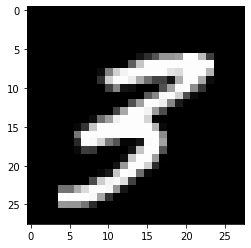

In [11]:
plt.imshow(x_train[509], cmap='gray')

우선 CNN을 적용시키기 이전에 데이터를 vectorization시킨 후 진행해보겠다.

In [12]:
# Vectorization for ANN
x_train_vectorize = x_train.reshape(60000, 784)
x_test_vectorize = x_test.reshape(10000, 784)

import tensorflow.keras as keras
num_categories = 10

y_train_onehot = keras.utils.to_categorical(y_train, num_categories)
y_test_onehot = keras.utils.to_categorical(y_test, num_categories)

In [13]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_vectorize, y_train_onehot,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test_vectorize, y_test_onehot))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3957 - accuracy: 0.9521 - val_loss: 0.5461 - val_accuracy: 0.9337
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3798 - accuracy: 0.9524 - val_loss: 0.7209 - val_accuracy: 0.9506
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3913 - accuracy: 0.9522 - val_loss: 0.5986 - val_accuracy: 0.9464
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3965 - accuracy: 0.9505 - val_loss: 0.6736 - val_accuracy: 0.9391
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4349 - accuracy: 0.9540 - val_loss: 0.7524 - val_accuracy: 0.9441
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4307 - accuracy: 0.9506 - val_loss: 0.9400 - val_accuracy: 0.9461
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4567 - accuracy: 0.9509 - val_loss: 0.8693 - val_accuracy:

# Keras Sequential model

## Specify Input Shape
***
Model should know the Input Shape. So, `Sequential`model's first layer(after this, layer know the shape) shold give the information.

 - Pass the `input_shape` to the first layer. This is a tuple containing shape information.(A tuple with an integer or `None` as an entry; `None` represents an arbitrary positive integer). The `input_shape` does not include batch dimension.
 - Some two-dimensional layers, such as `Dense`, can specify the input shape through the `input_dim` argument, and some three-dimensional layers(temporal) support the `input_dim` and `input_length` arguments. 

## Compile
***
Before Learning, you must configure the learning process with the `compile` method. This Method accepts three arguments.

 1. optimizer : It can be a string identifier that represents a built-in optimizer (such as `rmsprop` or `adagrad`), or an instance of the `optimizer` class.
 2. loss : Loss function. This is what the model wants to minimize. It can be the string identifier(`categorical_crossentropy` or `mse`, and so on) or an instance of the target function itself of the built-in loss function
 3. metrics : List of Metrics. If you solve the classification problem, It is recommended to use `metrics = ['accuracy']`. Metrics can be string identifiers for built-in metrics or user-defined metric functions.
 
## Train
***
The Keras model is trained based on input data and labels from the Numpy array. When you train a model, you typically use the `fit` function.

### [For the better explanation](https://www.codeonweb.com/entry/eda18bec-7c7d-426f-ab98-90e18db6fdba)

# Layer

## Activation Function
---
### 1. ReLU(Rectified Linear Unit activation function)

<p align ="center"><img src="https://mlnotebook.github.io/img/transferFunctions/relu.png"></p>

- __Features__

 1. It makes the vanishing gradient problem(tanh, sigmoid have) **MUCH WORSE**,since for all negative values the derivative is precisely zero.
 2. Computational Cost is not significant.
 3. In comparison to (sigmoid,tanh), convergence speed is much better.

### 2. softmax

- __Features__

 1. A function that normalizes the output value of a neuron at the last stage for class classification.(normalize sigmoid function)
 2. So, we can think that It converts the output into probability. (sum = 1.0)


## 결과에 대한 분석

우선 케라스의 `Sequential Model`, `compile`, `fit`과 `activation function`에 대해 간략히 적어보았다. 이전에 있어보이려고 영어로 적어봤는데 아까워서 그냥 붙여썼다.

결과에 대해 다뤄보자면, `epoch= 20`으로 수행한 결과 어느정도까지는 accuracy는 높아지고 loss는 낮아지는 좋은 현상이 일어났지만 그 이후로는 줄어들었다 늘어났다를 반복하여 결론적으로는 성능이 더 낮아졌다. 그 이유는 무엇일까?

정답은 이미지를 벡터로 표현했기 때문이다. 저번 시간에도 말했듯 이미지를 벡터화한다면 조금만 translation되어도 다른 이미지로 인식하므로 overfitting되는 결과가 나온다. 따라서 이를 방지하고자 CNN을 사용하는 것이다.

Convolution을 한 모델로 새롭게 해보자.

## New Model with Convolution

**새로 들어가기에 앞서 이 서버는 다른분들도 사용하셔서 항상 리소스를 반환해줘야한다.
따라서 학습이 끝난 후 리소스를 반환해주자.**

In [19]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [2]:
# using gpu:/1
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)


In [3]:
# using gpu:/1
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

import matplotlib.pyplot as plt

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import tensorflow.keras as keras
num_categories = 10

y_train_onehot = keras.utils.to_categorical(y_train, num_categories)
y_test_onehot = keras.utils.to_categorical(y_test, num_categories)

여기까지의 내용은 동일하다.

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

x_train_forConv = x_train.reshape(60000,28,28,1)
x_test_forConv = x_test.reshape(10000,28,28,1)

history = model.fit(x_train_forConv, y_train_onehot,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test_forConv, y_test_onehot))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1776 - accuracy: 0.9570 - val_loss: 0.1147 - val_accuracy: 0.9729
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0854 - accuracy: 0.9766 

epoch를 20으로 했더니 train data들은 대부분 loss도 감소하고 accuracy도 증가하지만 <br>
test data들은 loss도 들쭉날쭉에 accuracy는 감소하기까지한다.<br>
아직 `overfitting`의 문제를 해결하지 못했을 뿐만아니라 `vanishing/exploding gradient`또한 해결하지 못했다. <br>
이는 다음 실습에서 `batchnormalization`과 `dropdout`에 대해 공부해보고 좀 더 지켜보도록 하겠다.

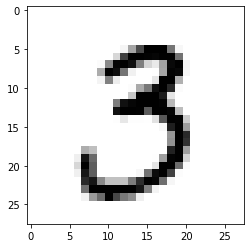

정답은 :  3


In [39]:
n = 90
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

import numpy as np

print('정답은 : ', np.argmax(model.predict(x_test[n].reshape((1,28,28,1)))))

랜덤하게 추출해서 확인해보자.

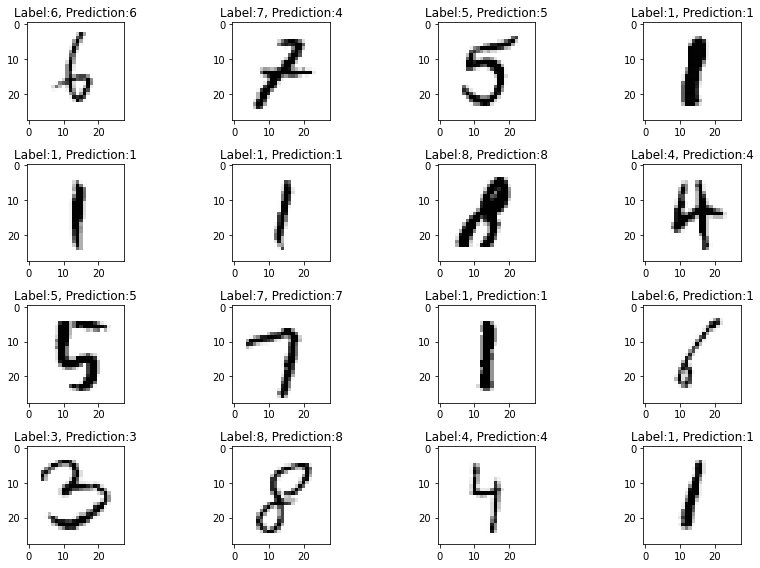

In [66]:
np.random.seed(0)

use_samples = np.random.randint(5000,size = 16)
samples_to_predict = []

count = 0
nrows = ncols = 4

plt.figure(figsize = (12,8))


for sample in use_samples:
  count+=1
  plt.subplot(nrows,ncols,count)
  reshaped_image = x_test[sample].reshape((28, 28))
  plt.imshow(reshaped_image,cmap='Greys', interpolation='nearest')
  samples_to_predict.append(x_test[sample])
  tmp = "Label:" + str(y_test[sample]) + ", Prediction:" + str(np.argmax(model.predict(x_test[sample].reshape((1,28,28,1)))))
  plt.title(tmp)

plt.tight_layout()
plt.show()

약간의 오차가 있는 듯하다. 이는 다른 `Layer`들을 공부하면서 줄여보도록 하겠다.

그리고 리소스반환도 필수다!

In [67]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}